# ***TASK 1: Time Series Analysis***

📊 Preview of Time Series Data:
            Quote_Count
Date                   
2022-01-01    23.000000
2022-01-02    15.301000
2022-01-03    21.598963
2022-01-04    25.890880
2022-01-05    16.173807


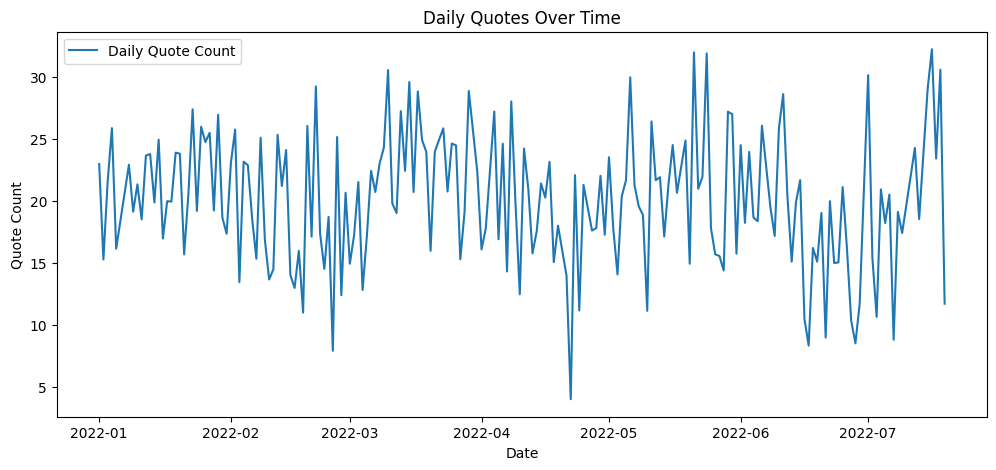

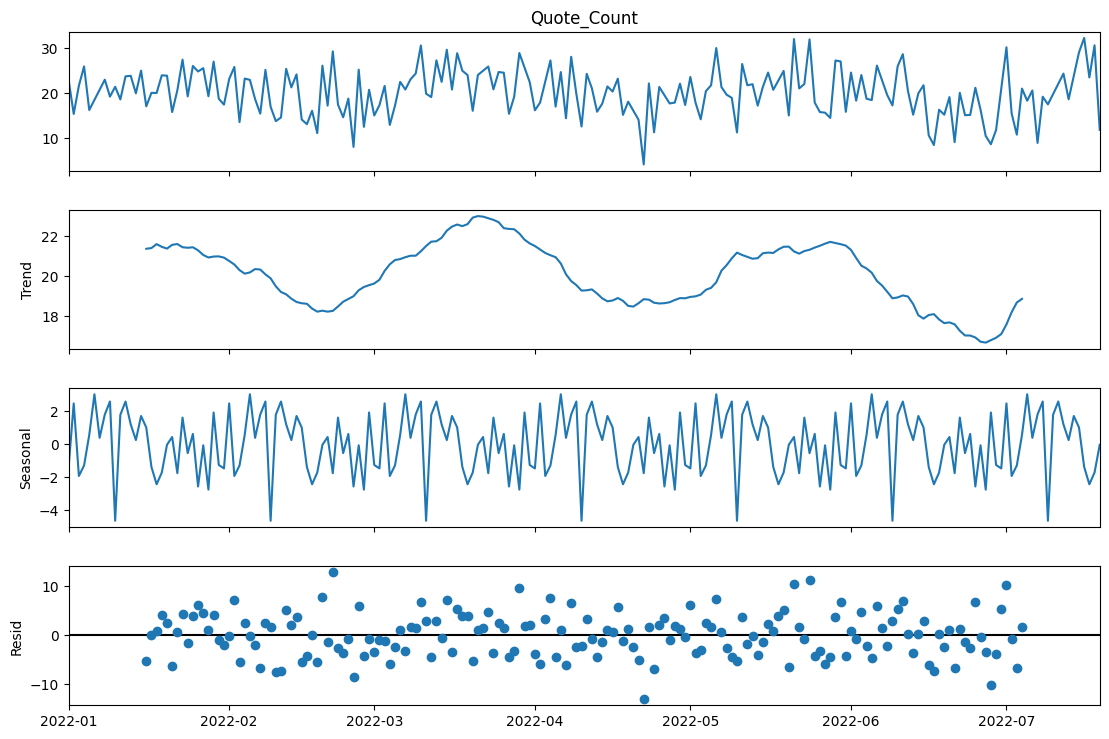

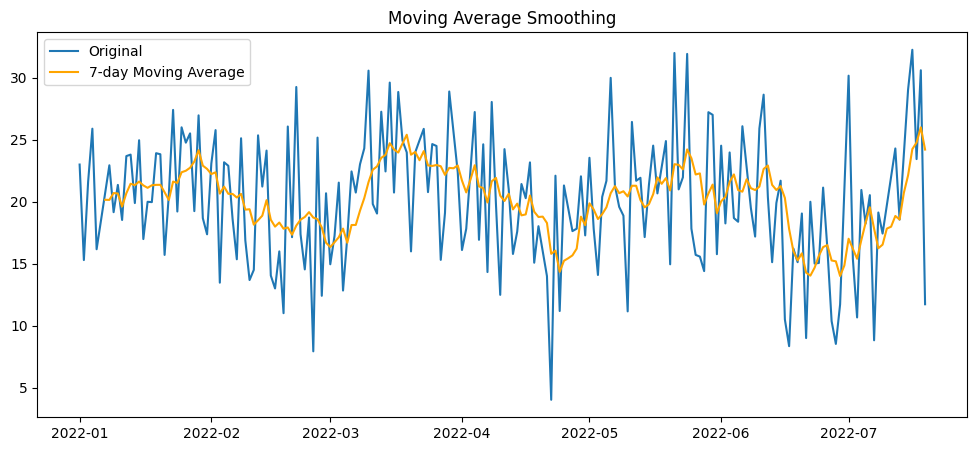

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


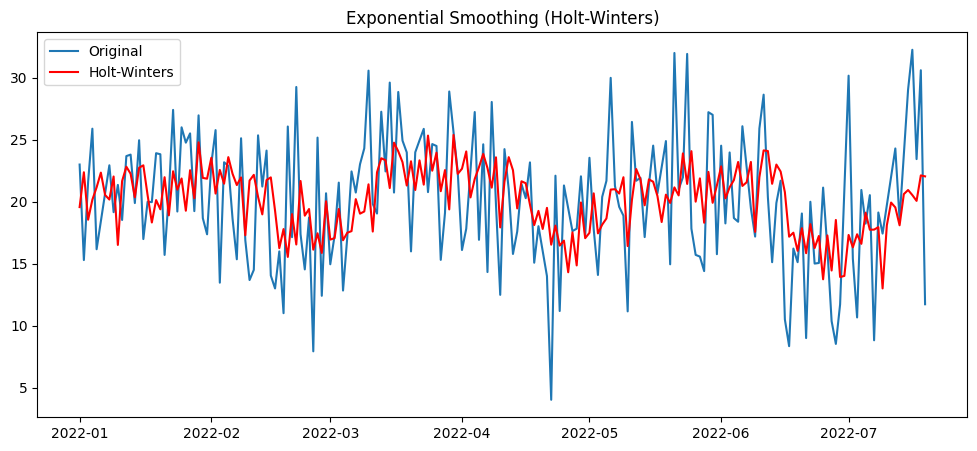

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


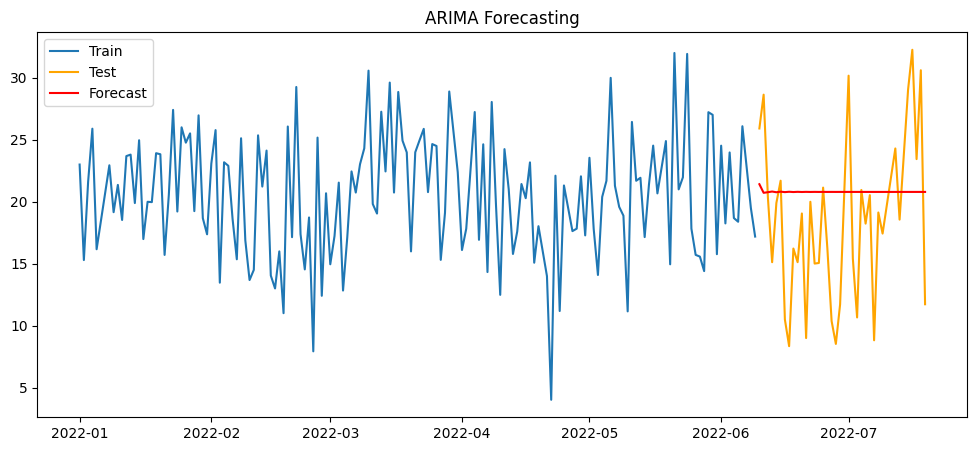

✅ RMSE of ARIMA Forecast: 6.70


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import math


# Step 1: Create Synthetic Time Series Data
# Let's assume we have daily counts of quotes posted
np.random.seed(42)
dates = pd.date_range(start="2022-01-01", periods=200, freq="D")
counts = np.random.poisson(lam=20, size=200) + np.sin(np.linspace(0, 20, 200)) * 3

df = pd.DataFrame({"Date": dates, "Quote_Count": counts})
df.set_index("Date", inplace=True)

print("📊 Preview of Time Series Data:")
print(df.head())


# Step 2: Plot Original Series
plt.figure(figsize=(12,5))
plt.plot(df["Quote_Count"], label="Daily Quote Count")
plt.title("Daily Quotes Over Time")
plt.xlabel("Date")
plt.ylabel("Quote Count")
plt.legend()
plt.show()


# Step 3: Decomposition
decomposition = seasonal_decompose(df["Quote_Count"], model="additive", period=30)

fig = decomposition.plot()
fig.set_size_inches(12,8)
plt.show()


# Step 4: Moving Average & Exponential Smoothing
df["MA_7"] = df["Quote_Count"].rolling(window=7).mean()

plt.figure(figsize=(12,5))
plt.plot(df["Quote_Count"], label="Original")
plt.plot(df["MA_7"], label="7-day Moving Average", color="orange")
plt.legend()
plt.title("Moving Average Smoothing")
plt.show()

# Holt-Winters Exponential Smoothing
model_hw = ExponentialSmoothing(df["Quote_Count"], trend="add", seasonal="add", seasonal_periods=30)
fit_hw = model_hw.fit()
df["HW_Fitted"] = fit_hw.fittedvalues

plt.figure(figsize=(12,5))
plt.plot(df["Quote_Count"], label="Original")
plt.plot(df["HW_Fitted"], label="Holt-Winters", color="red")
plt.legend()
plt.title("Exponential Smoothing (Holt-Winters)")
plt.show()


# Step 5: ARIMA Forecasting
train_size = int(len(df) * 0.8)
train, test = df["Quote_Count"][:train_size], df["Quote_Count"][train_size:]

model_arima = ARIMA(train, order=(2,1,2))  # (p,d,q)
fit_arima = model_arima.fit()

forecast = fit_arima.forecast(steps=len(test))

plt.figure(figsize=(12,5))
plt.plot(train, label="Train")
plt.plot(test, label="Test", color="orange")
plt.plot(test.index, forecast, label="Forecast", color="red")
plt.legend()
plt.title("ARIMA Forecasting")
plt.show()


# Step 6: Evaluation
rmse = math.sqrt(mean_squared_error(test, forecast))
print(f"✅ RMSE of ARIMA Forecast: {rmse:.2f}")


# ***TASK 2: Natural Language Processing (NLP) - Text Classification***

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

# Load your dataset
df = pd.read_csv("quotes_dataset_cleaned.csv")

# Create 'Popular_Author' column: authors with >1 quote -> 1, else 0
df['Popular_Author'] = df.groupby('Author')['Author'].transform(lambda x: (len(x) > 1)).astype(int)

# Features and labels
X = df['Cleaned_Quote']
y = df['Popular_Author']

# Convert text to TF-IDF vectors
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(X)

# Define models
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000)
}

# Use StratifiedKFold for balanced splitting
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

results = []

for name, model in models.items():
    scores = cross_val_score(model, X_tfidf, y, cv=cv, scoring="accuracy")
    results.append({"Model": name, "Mean Accuracy": scores.mean(), "Std Dev": scores.std()})
    print(f"\n{name}:")
    print("Fold Accuracies:", scores)
    print("Mean Accuracy:", scores.mean(), "±", scores.std())

# Save comparison to CSV
results_df = pd.DataFrame(results)
results_df.to_csv("classification_cv_results.csv", index=False)
print("\nSaved results to classification_cv_results.csv")


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(



Naive Bayes:
Fold Accuracies: [0.5 0.5 0.5 1.  1. ]
Mean Accuracy: 0.7 ± 0.2449489742783178

Logistic Regression:
Fold Accuracies: [0.5 0.5 0.5 1.  1. ]
Mean Accuracy: 0.7 ± 0.2449489742783178

Saved results to classification_cv_results.csv


# ***TASK 3: Neural Networks with TensorFlow/Keras***

Epoch 1/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8081 - loss: 0.6225 - val_accuracy: 0.9594 - val_loss: 0.1394
Epoch 2/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9367 - loss: 0.2043 - val_accuracy: 0.9636 - val_loss: 0.1205
Epoch 3/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.9545 - loss: 0.1525 - val_accuracy: 0.9685 - val_loss: 0.1012
Epoch 4/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9611 - loss: 0.1260 - val_accuracy: 0.9698 - val_loss: 0.1015
Epoch 5/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9642 - loss: 0.1159 - val_accuracy: 0.9726 - val_loss: 0.0895
Epoch 6/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9698 - loss: 0.0968 - val_accuracy: 0.9756 - val_loss: 0.0844
Epoch 7/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9684 - loss: 0.0991 - val_accuracy: 0.9759 - val_loss: 0.0821
Epoch 8/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.9730 - loss: 0.0895 - val_accuracy:

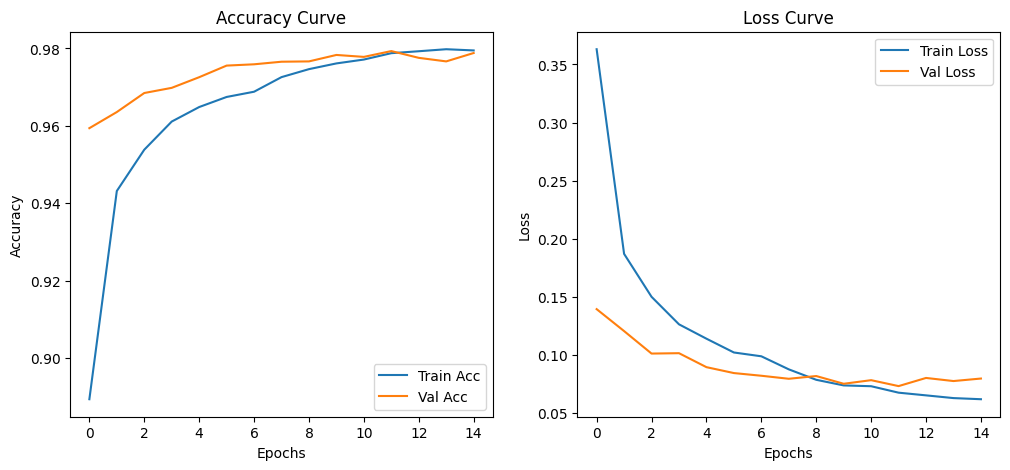

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Load dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize
x_train = x_train.reshape(-1, 28*28).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28*28).astype("float32") / 255.0

# One-hot encode labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Build improved model
model = Sequential([
    Dense(256, activation="relu", input_shape=(784,)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(128, activation="relu"),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation="relu"),
    Dense(10, activation="softmax")
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# Early stopping
early_stop = EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)

# Train
history = model.fit(x_train, y_train,
                    validation_split=0.2,
                    epochs=30,
                    batch_size=64,
                    callbacks=[early_stop],
                    verbose=1)

# Evaluate
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")

# Plot accuracy & loss curves
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val Acc")
plt.title("Accuracy Curve")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.title("Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()
